In [3]:
%cd /content/drive/MyDrive/multi/0427

/content/drive/MyDrive/multi/0427


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 군집화(Clustering) - KMeans 알고리즘

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

- K-Means 모델 생성/학습

In [13]:
from sklearn.cluster import KMeans

km = KMeans()
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [15]:
## 비지도 학습이라 y값은 없다.
km = KMeans(n_clusters=3, random_state=2022)
km.fit(iris_std)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [16]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

In [23]:
df = pd.DataFrame(
    {
        'PC1':iris_pca[:,0],
        'PC2':iris_pca[:,1],
        'target':iris.target,
        'cluster':km.labels_
    }
)
df.tail()

,PC1,PC2,target,cluster
145,1.870503,0.386966,2,2
146,1.564580,-0.896687,2,0
147,1.521170,0.269069,2,2
148,1.372788,1.011254,2,2
149,0.960656,-0.024332,2,0


In [27]:
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         39
       2         11
2      0         14
       2         36

- 군집 결과 시각화

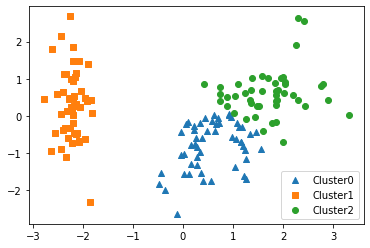

In [29]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df[df.cluster==i]['PC1']
    y_data = df[df.cluster==i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='Cluster'+str(i))

plt.legend()
plt.show()

- 원본 데이터와 군집화된 데이터 비교

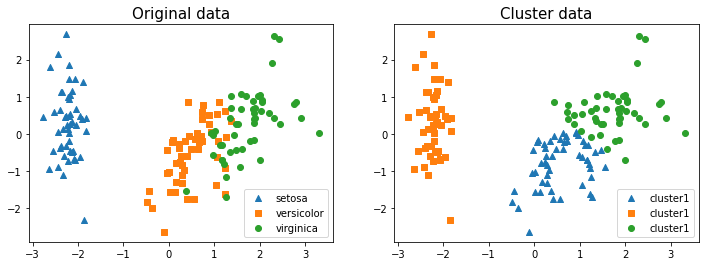

In [32]:
plt.figure(figsize=(12,4))

for i, column in enumerate(['target', 'cluster']):
    plt.subplot(1,2,i+1)
    for j, marker in enumerate(markers):
        x_data = df[df[column]==j]['PC1']
        y_data = df[df[column]==j]['PC2']
        if i == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[j])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.legend()
plt.show()